# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [301]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [302]:
print("Зафиксировать последовательность псевдослучайных чисел для повторяемости эксперимента")

Зафиксировать последовательность псевдослучайных чисел для повторяемости эксперимента


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [303]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [304]:
# your code here
df_train.sample(n=10)
df_train.name.sample(n=10)

6973                   Tata Nexon 1.5 Revotorq XT
2638                           Maruti Wagon R VXI
4256                       Maruti Swift Dzire VDI
5699                       Maruti Swift Dzire ZDI
2629                  Maruti Omni E MPI STD BS IV
5512                           Tata Indica V2 LSi
4885                           Tata Nano Twist XE
1964                    Maruti Omni 8 Seater BSII
2343    Ford EcoSport 1.5 Ti VCT AT Titanium BSIV
5179                          Mahindra TUV 300 T8
Name: name, dtype: object

(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [305]:
# your code here
sliced_df = pd.concat([df_train.head(5), df_train.tail(5)])
sliced_df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
6996,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0
6998,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [306]:
# your code here
df_train.describe()

,year,selling_price,km_driven,seats
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.419008
std,4.053095,8.089419e+05,5.772400e+04,0.965767
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [307]:
df_train.describe(include='object')

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6999,6999,6999,6999,6999,6797,6797,6803,6796
unique,1924,4,3,2,5,386,120,316,419
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,116,3793,5826,6095,4587,197,885,330,468


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [308]:
# your code here
df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [309]:
# your code here
print(df_train.loc[:, df_train.columns != 'selling_price'].duplicated().sum())

1159


(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [310]:
# your code here
dubl = df_train.loc[:, df_train.columns != 'selling_price'].duplicated()
df_train.loc[dubl,df_train.columns]




,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,400000,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,140000,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [311]:
# your code here
# в начале удалим все дубликаты по всем колонкам
df_train.drop_duplicates(inplace=True)
# теперь оставляем первый дубликат из тех у которых отличается цена
df_train.drop_duplicates(subset=df_train.columns.drop(
    'selling_price'), keep='first', inplace=True)
df_train.shape

(5840, 13)

In [312]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [313]:
# your code here
df_train.reset_index(drop=True, inplace=True)
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [314]:
# Уберем единицы измерения для признаков mileage, engne, maxppower
df_train[['mileage','engine','max_power']] = df_train.loc[:,['mileage','engine','max_power']].replace(regex=True, to_replace=r'[^0-9.\\-]', value=r'')
df_train[['mileage','engine','max_power']] = df_train[['mileage','engine','max_power']].apply(pd.to_numeric)
print(df_train.dtypes)

# аналогично сделаем для test 
df_test[['mileage','engine','max_power']] = df_test.loc[:,['mileage','engine','max_power']].replace(regex=True, to_replace=r'[^0-9.\\-]', value=r'')
df_test[['mileage','engine','max_power']] = df_test[['mileage','engine','max_power']].apply(pd.to_numeric)
print(df_test.dtypes)

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
torque            object
seats            float64
dtype: object
name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
torque            object
seats            float64
dtype: object


Я попробовал разные подходы. Первый вариант убрал все цифры из колонки Torque и оставил только буквы.
 Получилось около 29-30 различных масок. Следовательно вариант с парсингом по маске отпал
Пробовал делать решение с функцией и регулярными выражениями. Получалось громоздко. 
В итоге меня осенило :) 
Решил сделать такой алгоритм. 
Можно выбрать все первые цифры, которые имеют размерность Nm или nm
Даже в этом случае 380Nm(38.7kgm)@ 2500rpm у нас Nm идет спереди. 
Получаем, что минимальное NM 51. 


In [315]:
# смотрим минимальное nm/Nm
tor_temp = pd.to_numeric(df_train.torque.str.extract(r"(?P<torque>\d{1,}.?\d+)[nNm]").torque)
print(tor_temp.min())
# смотрим максимальное kgm
tor_temp = pd.to_numeric(df_train.torque.str.extract(r"(?P<torque>\d{1,}.?\d+)[kgm]").torque)
print(tor_temp.max())
# делаем вывод, что для torque мы можем вытащить число идущее до @ и если оно меньше 51 , то нужно домножить на 9.8 
# убираем ',' из cтолбца и все буквы 
df_train['torque'] = df_train.torque.str.replace(',', '')
# извлекаем torque 
df_train['torque_new'] = df_train.torque.str.extract(r"^(?P<torque_new>\d{1,}\.\d+|\d+).*$").torque_new
# c rpm все просто берем первое значение. Для бензиновых это одна цифра для дизелей это диапазон. 
# Если бы было больше времени, можно было бы расмотреть, если разница для случаев если для дизеля брать нижнее или верхнее значение или среднее 
df_train['rpm'] = df_train.torque.str.extract(r"^.*(\@ |at )(?P<rpm>\d+).*$").rpm

# переводим значения в numeric 
df_train['torque_new'] = pd.to_numeric(df_train.torque_new)
df_train['rpm'] = pd.to_numeric(df_train.rpm)
# домножаем все значения в torque где <51 на 9.8
df_train['torque_new'] = df_train['torque_new'].apply(lambda x: x * 9.8 if x <51 else x)

# ----тоже самое что и выше делаем для теста ----
df_test['torque'] = df_test.torque.str.replace(',', '')
# извлекаем torque 
df_test['torque_new'] = df_test.torque.str.extract(r"^(?P<torque_new>\d{1,}\.\d+|\d+).*$").torque_new
# c rpm все просто берем первое значение. Для бензиновых это одна цифра для дизелей это диапазон. 
# Если бы было больше времени, можно было бы расмотреть, если разница для случаев если для дизеля брать нижнее или верхнее значение или среднее 
df_test['rpm'] = df_test.torque.str.extract(r"^.*(\@ |at )(?P<rpm>\d+).*$").rpm

# переводим значения в numeric 
df_test['torque_new'] = pd.to_numeric(df_test.torque_new)
df_test['rpm'] = pd.to_numeric(df_test.rpm)
# домножаем все значения в torque где <51 на 9.8
df_test['torque_new'] = df_test['torque_new'].apply(lambda x: x * 9.8 if x <51 else x)


51.0
38.7


In [316]:
# дропаем старый torque 
df_train.drop(['torque'],axis=1 ,inplace = True)
df_test.drop(['torque'],axis=1 ,inplace = True)



(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [317]:
# your code here
cat_features_mask = (df_train.dtypes == "object").values
df_train_updated = df_train.copy()
df_test_updated = df_test.copy()
# получаем медианы с трейна 
mileage_median = df_train_updated['mileage'].mean()
engine_median = df_train_updated['engine'].mean()
max_power_median = df_train_updated['max_power'].mean()
seats_median = df_train_updated['seats'].mean()
torque_new_median = df_train_updated['torque_new'].mean()
rpm_median = df_train_updated['rpm'].mean()
# заполняем медианы по трейну 
df_train_updated['mileage'] = df_train_updated['mileage'].fillna(mileage_median)
df_train_updated['engine'] = df_train_updated['engine'].fillna(engine_median)
df_train_updated['max_power'] = df_train_updated['max_power'].fillna(max_power_median)
df_train_updated['seats'] = df_train_updated['seats'].fillna(seats_median)
df_train_updated['torque_new'] = df_train_updated['torque_new'].fillna(torque_new_median)
df_train_updated['rpm'] = df_train_updated['rpm'].fillna(rpm_median)
# проверяем, что nan больше нет 
print(df_train_updated.isna().sum())
# заполняем для теста
df_test_updated['mileage'] = df_test_updated['mileage'].fillna(mileage_median)
df_test_updated['engine'] = df_test_updated['engine'].fillna(engine_median)
df_test_updated['max_power'] = df_test_updated['max_power'].fillna(max_power_median)
df_test_updated['seats'] = df_test_updated['seats'].fillna(seats_median)
df_test_updated['torque_new'] = df_test_updated['torque_new'].fillna(torque_new_median)
df_test_updated['rpm'] = df_test_updated['rpm'].fillna(rpm_median)
# проверяем, что нет nan в тесте 
print(df_test_updated.isna().sum())





name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
torque_new       0
rpm              0
dtype: int64
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
torque_new       0
rpm              0
dtype: int64



(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [318]:
print("С одной стороны мы можем сравнивать Seats как число. 8 > 5. Но Seats принимает конечное количество значений. Врядли мы можем представить автомобиль на 1000 мест ")



С одной стороны мы можем сравнивать Seats как число. 8 > 5. Но Seats принимает конечное количество значений. Врядли мы можем представить автомобиль на 1000 мест 


In [319]:
# your code here
# приведем в int
df_train_updated = df_train_updated.astype({"seats":"int","engine":"int"})
df_test_updated = df_test_updated.astype({"seats":"int","engine":"int"})

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

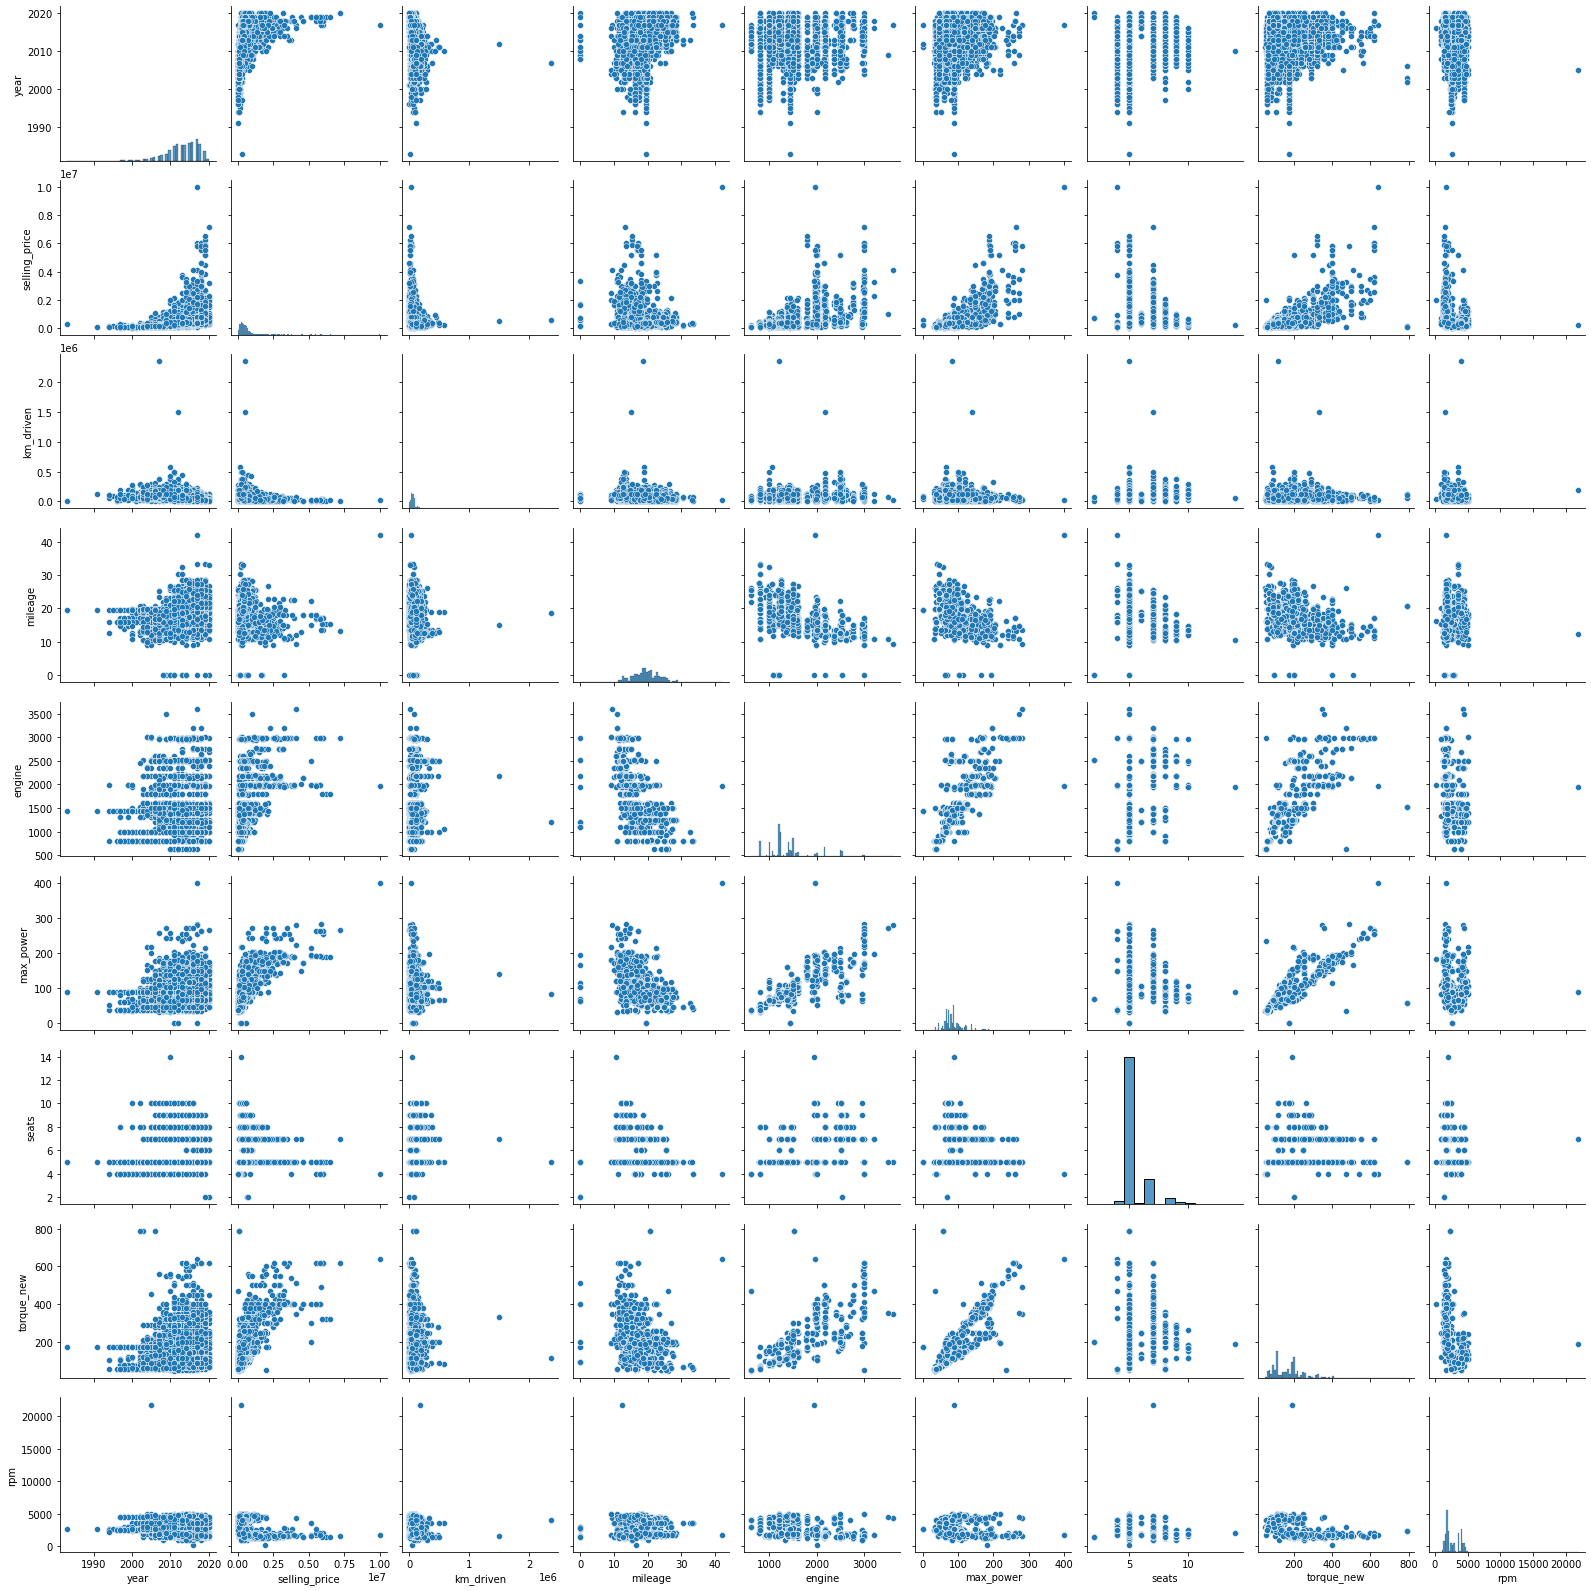

In [320]:
# your code here
sns.pairplot(df_train_updated)

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной? \
Сразу видно, что seats не особо влияет на цену.  Расход топлива тоже почти не влияет на цену.  Выглядит , что как и можно было ожидать влияет, год, мощность

* А о корреляциях признаков? \
Как и логично предположить, что мощность связана с объемом и крутящим моментом.  Также виднеется связь между мощностью, объемом мотора и расходом топлива \
Также на графиках заметил , что есть машина у которой крутящий момент почти 800 Nm :) мне стало интересно посмотреть, что эта за машина \
Оказалось https://www.cardekho.com/overview/Maruti_Zen/Maruti_Zen_D.htm  у данной машинки крутящий момент почти такой же как на 6 литровой BMW X5.

 </font>

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font> 

<font color='#FF6600'>"Да в целом похожи, но видно , что на тесте как и ожидается меньше данных чем в train"</font>


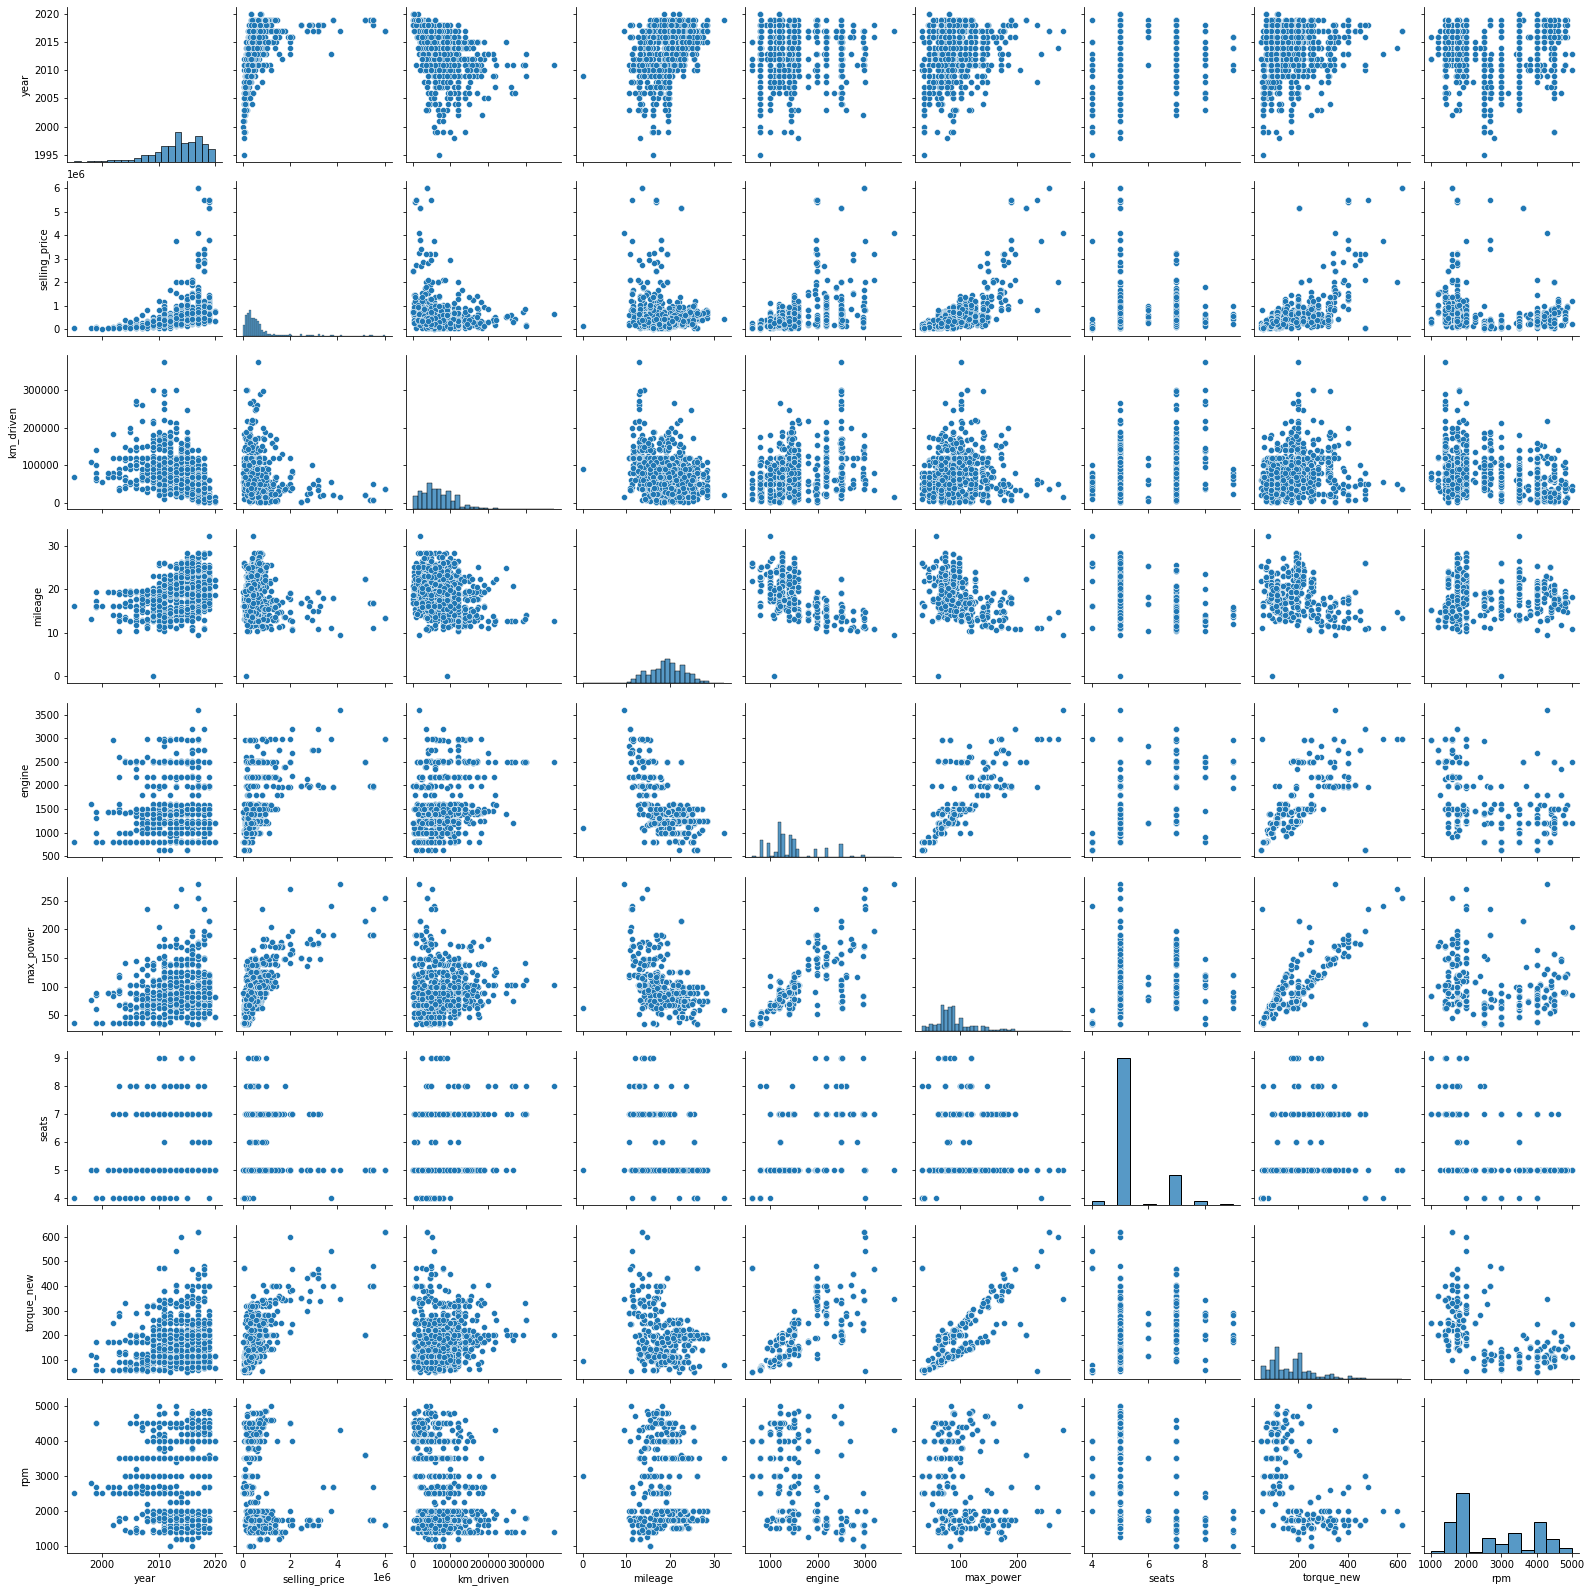

In [110]:
# your code here
sns.pairplot(df_test_updated)

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

<AxesSubplot:>

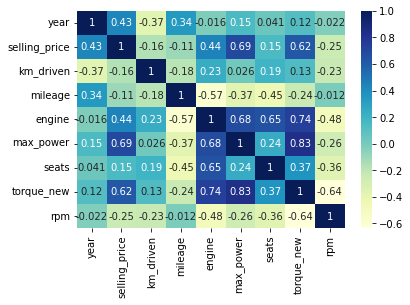

In [111]:
# your code here
df_train_updated[df_train_updated.columns[~cat_features_mask]]
sns.heatmap(df_train_updated[df_train_updated.columns[~cat_features_mask]].corr(), cmap="YlGnBu", annot=True)


Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>\
Например rpm и year. mileage и rpm 
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>\
Между мощностью и ценой. Между крутящим моментом и ценой, что в целом ожидаеом т.к. мощность и крутящий момент связаны.  Сюда же можно отнести еще объем мотора. 
Также видна связь между ценой и годом.

* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>\
Если честно в контексте вопроса не очень понятно меньше год в плане числа или в плане , что новее машина. Между year и km_driven мы видим связь со знаком минус это значит, что два признака идут в противоположных направлениях.
Т.е. правильнее сказать чем больше год(новее) тем меньше километров машина проехала.  

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

<AxesSubplot:xlabel='max_power', ylabel='torque_new'>

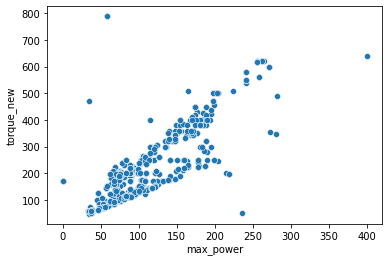

In [329]:
# Наиболее скорелированной парой является мощность и крутящий момент кореляция 0.83, что в целом ожидаемо
sns.scatterplot(data=df_train_updated, x="max_power", y="torque_new")

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

<AxesSubplot:xlabel='max_power', ylabel='selling_price'>

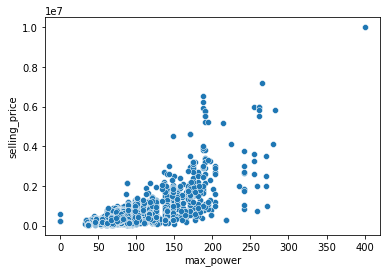

In [298]:
# Думаю в предыдущем пункте у тех кто выбросил torque было данное распределение
sns.scatterplot(data=df_train_updated, x="max_power", y="selling_price")

# но в целом из-за зависимости между мощность и torque понятно, почему его можно было дропнуть :) 

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [321]:
y_train = df_train_updated['selling_price']
X_train = df_train_updated[df_train_updated.columns[~cat_features_mask]].drop(['selling_price'], axis=1)


In [322]:
#поменял число столбцов на 8 т.к. я разбил torque на 2 
assert X_train.shape == (5840, 8)

In [323]:
y_test = df_test_updated['selling_price']
X_test = df_test_updated[df_train_updated.columns[~cat_features_mask]].drop(['selling_price'], axis=1)


In [324]:
#поменял число столбцов на 8 т.к. я разбил torque на 2
assert X_test.shape == (1000, 8)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [325]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

# your code here
model = LinearRegression()
model.fit(X_train, y_train)
prediction_train = model.predict(X_train)
prediction_test = model.predict(X_test)
print(model.coef_)
features_weights = {
    'features' : X_train.columns,
    'weights' : model.coef_
    }
pd.DataFrame(data=features_weights).sort_values(by=['weights'], ascending=False)


[ 4.04712868e+04 -8.22048608e-01 -2.63054909e+03  2.41866470e+01
  8.75754551e+03 -3.41827351e+04  8.16084964e+02 -2.96121753e+01]


,features,weights
0,year,40471.286768
4,max_power,8757.545512
6,torque_new,816.084964
3,engine,24.186647
1,km_driven,-0.822049
7,rpm,-29.612175
2,mileage,-2630.549092
5,seats,-34182.735054


In [326]:
train_r2_score = r2_score(y_train,prediction_train)
test_r2_score = r2_score(y_test, prediction_test)

train_mse = MSE(y_train,prediction_train)
test_mse = MSE(y_test,prediction_test)

scores = {'train_r2': train_r2_score, 'test_r2': test_r2_score,
           'train_mse':train_mse, 'test_mse':test_mse }
print(scores)

{'train_r2': 0.6012166750806596, 'test_r2': 0.5978055282398732, 'train_mse': 114306589619.7129, 'test_mse': 231192867287.64078}


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [327]:
from sklearn.preprocessing import StandardScaler
from sklearn_pandas import DataFrameMapper

# your code here
mapper = DataFrameMapper([(X_train.columns, StandardScaler())])
scaler = StandardScaler()
scaler.fit(X_train)
transformed_X_train = scaler.transform(X_train.copy())
X_train = pd.DataFrame(transformed_X_train, index=X_train.index, columns=X_train.columns)
transformed_X_test = scaler.transform(X_test)
X_test = pd.DataFrame(transformed_X_test, index=X_test.index, columns=X_test.columns)




In [328]:
# теперь переобучим модель на отмасштабированных данных
model = LinearRegression()
model.fit(X_train, y_train)
prediction_train = model.predict(X_train)
prediction_test = model.predict(X_test)

In [329]:
# выведем метрики  
train_r2_score = r2_score(y_train,prediction_train)
test_r2_score = r2_score(y_test, prediction_test)

train_mse = MSE(y_train,prediction_train)
test_mse = MSE(y_test,prediction_test)

scores = {'train_r2': train_r2_score, 'test_r2': test_r2_score,
           'train_mse':train_mse, 'test_mse':test_mse }
print(scores)

{'train_r2': 0.60121667508066, 'test_r2': 0.597805528239876, 'train_mse': 114306589619.7128, 'test_mse': 231192867287.63922}


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font> \
max_power

In [330]:
# your code here
features_weights = {
    'features' : X_train.columns,
    'weights' : model.coef_
    }
pd.DataFrame(data=features_weights).sort_values(by=['weights'], ascending=False)




,features,weights
4,max_power,276904.024007
0,year,165740.898248
6,torque_new,68480.592981
3,engine,11718.546799
2,mileage,-10484.360145
7,rpm,-32847.020768
5,seats,-33576.327924
1,km_driven,-49377.166098


(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [331]:
from sklearn.linear_model import Lasso

# your code here
model = Lasso()
model.fit(X_train, y_train)
prediction_train = model.predict(X_train)
prediction_test = model.predict(X_test)

In [332]:
# выведем метрики  
train_r2_score = r2_score(y_train,prediction_train)
test_r2_score = r2_score(y_test, prediction_test)

train_mse = MSE(y_train,prediction_train)
test_mse = MSE(y_test,prediction_test)

scores = {'train_r2': train_r2_score, 'test_r2': test_r2_score,
           'train_mse':train_mse, 'test_mse':test_mse }
print(scores)

{'train_r2': 0.6012166750352209, 'test_r2': 0.5978043261541364, 'train_mse': 114306589632.73737, 'test_mse': 231193558280.84866}


In [407]:
model.coef_

array([165740.81594854, -49377.12787105, -10484.23972259,  11718.45673757,
       276904.08131592, -33576.1642854 ,  68480.59671612, -32846.93897134])

<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

Один из важных параметров L1 регуляризации это коэфициент регуляризации , который по умолчанию равен 1 и исходя из результатов данное значение нам не подошло
А принимает он значения от 0 до бесконечности 

In [333]:
# your code here
features_weights = {
    'features' : X_train.columns,
    'weights' : model.coef_
    }
pd.DataFrame(data=features_weights).sort_values(by=['weights'], ascending=False)

,features,weights
4,max_power,276905.465920
0,year,165738.839977
6,torque_new,68480.678485
3,engine,11716.290551
2,mileage,-10481.349185
7,rpm,-32844.979630
5,seats,-33572.234177
1,km_driven,-49376.210038


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [334]:
from sklearn.model_selection import GridSearchCV
# your code here
params = {'alpha': (np.logspace(-8, 8, 100))} 
lasso = Lasso()
lasso_model = GridSearchCV(lasso, params, cv = 10)
lasso_model.fit(X_train, y_train)
print(lasso_model.best_params_)
print(lasso_model.best_score_)
print(lasso_model.best_index_)


{'alpha': 27825.59402207126}
0.5847691793771979
77


<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>\
77 

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>\
Коэффициент 27825.59402207126 как я понимаю допустимые значения от 0 до бесконечности\
Да, как видно ниже занулились engine, seats, rpm, mileage

In [335]:
# your code here

features_weights = {
    'features' : X_train.columns,
    'weights' : lasso_model.best_estimator_.coef_
    }
pd.DataFrame(data=features_weights).sort_values(by=['weights'], ascending=False)

,features,weights
4,max_power,259342.062994
0,year,144894.399615
6,torque_new,73969.431831
2,mileage,0.000000
3,engine,0.000000
5,seats,-0.000000
7,rpm,-0.000000
1,km_driven,-23694.182444


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [336]:
from sklearn.linear_model import ElasticNet
import warnings
from sklearn.exceptions import ConvergenceWarning
# как я понимаю ConvergenceWarning можно игнорировать
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    params = {'alpha': (np.logspace(-8, 8, 100)), 'l1_ratio':np.arange (0, 1, 0.2)} 
    elastic = ElasticNet()
    elastic_model = GridSearchCV(elastic, params, cv = 10)
    elastic_model.fit(X_train, y_train)


<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [337]:
# your code here
print(elastic_model.best_params_)
print(elastic_model.best_score_)
print(elastic_model.best_index_)

{'alpha': 0.18738174228603868, 'l1_ratio': 0.0}
0.5821559845651256
225


Предлагаем вам оставить ваши попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.5 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [35]:
# в моем случае это df_train_updated где я добавил median для пропущенных данных
X_train_cat = df_train_updated.drop(columns=['name','selling_price'])

In [36]:
# число столбцов на 12 т.к. я разбивал torque на 2 
assert X_train_cat.shape == (5840, 12)

(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [38]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas
X_train_cat_dum = pd.get_dummies(X_train_cat, drop_first=True)
# your code here


(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>\
Выглядит, что улучшилось 

In [39]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# your code here
params = {'alpha': (np.logspace(-8, 8, 100))} 
ridge = Ridge()
ridge_model = GridSearchCV(ridge, params, cv = 10, scoring='r2')
ridge_model.fit(X_train_cat_dum, y_train
                )

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-08, 1.45082878e-08, 2.10490414e-08, 3.05385551e-08,
       4.43062146e-08, 6.42807312e-08, 9.32603347e-08, 1.35304777e-07,
       1.96304065e-07, 2.84803587e-07, 4.13201240e-07, 5.99484250e-07,
       8.69749003e-07, 1.26185688e-06, 1.83073828e-06, 2.65608778e-06,
       3.85352859e-06, 5.59081018e-06, 8.11130831e-06, 1...
       1.91791026e+04, 2.78255940e+04, 4.03701726e+04, 5.85702082e+04,
       8.49753436e+04, 1.23284674e+05, 1.78864953e+05, 2.59502421e+05,
       3.76493581e+05, 5.46227722e+05, 7.92482898e+05, 1.14975700e+06,
       1.66810054e+06, 2.42012826e+06, 3.51119173e+06, 5.09413801e+06,
       7.39072203e+06, 1.07226722e+07, 1.55567614e+07, 2.25701972e+07,
       3.27454916e+07, 4.75081016e+07, 6.89261210e+07, 1.00000000e+08])},
             scoring='r2')

Добавил r2 явно. Из документации правда следует, что для регрессии по умолчанию r2\
By default, parameter search uses the score function of the estimator to evaluate a parameter setting. These are the sklearn.metrics.accuracy_score for classification and sklearn.metrics.r2_score for regression. 

In [40]:
print(ridge_model.best_params_)
print(ridge_model.best_score_)
print(ridge_model.best_index_)

{'alpha': 5.336699231206324}
0.6162084989519162
54


# Часть 4 - бонусная (1.5 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [237]:
# сделаем копию данных
df_new = df_train_updated.copy()
# упростим name до имени бренда. т.к. ясное дело BMW дороже чем Hyandai 
df_new['name'] =  df_new.name.str.extract(r"^(?P<brand_name>\w{1,})\s.*$").brand_name
# Уберем столбец rpm, seats, engine, mileage т.к. rpm,seats и mileage слабо влияют на цену. А engine связан с переменной max_power
df_new.drop(columns=['rpm','seats','engine', 'mileage'], inplace=True)
# как предположение, на цену так же должны влиять fuel - дизельные машины более дорогие.  Колиечество владельцев , чем меньше тем лучше.  Кто продает. Дилеру по идее больше доверия. А Trustmark dealer вообще много :) 
# manual трансмисия по идее тоже должна быть дешевле чем automate
# тип коробки на 0 и 1 
df_new['transmission'] = df_new['transmission'].map({'Manual' : 1, 'Automatic' : 0})
# машины с fuel type LPG и CNG это всего лишь 1 % думаю их можно дропнуть
df_new = df_new[~df_new['fuel'].isin(['CNG','LPG'])]
# После этого Fuel тоже можно закодировать в 1 и 0 
df_new['fuel'] = df_new['fuel'].map({'Diesel' : 1, 'Petrol' : 0})
print(df_new.describe(include='object'))


df_new_test = df_test_updated.copy()
df_new_test['name'] =  df_new_test.name.str.extract(r"^(?P<brand_name>\w{1,})\s.*$").brand_name
# Уберем столбец rpm, seats, engine, mileage т.к. rpm,seats и mileage слабо влияют на цену. А engine связан с переменной max_power
df_new_test.drop(columns=['rpm','seats','engine', 'mileage'], inplace=True)
# как предположение, на цену так же должны влиять fuel - дизельные машины более дорогие.  Колиечество владельцев , чем меньше тем лучше.  Кто продает. Дилеру по идее больше доверия. А Trustmark dealer вообще много :) 
# manual трансмисия по идее тоже должна быть дешевле чем automate
# тип коробки на 0 и 1 
df_new_test['transmission'] = df_new_test['transmission'].map({'Manual' : 1, 'Automatic' : 0})
# машины с fuel type LPG и CNG это всего лишь 1 % думаю их можно дропнуть
df_new_test = df_new_test[~df_new_test['fuel'].isin(['CNG','LPG'])]
# После этого Fuel тоже можно закодировать в 1 и 0 
df_new_test['fuel'] = df_new_test['fuel'].map({'Diesel' : 1, 'Petrol' : 0})


# Посмотрим какие марки есть в тесте но нет в train и уберем их 
print(df_new_test[df_new_test['name'].isin(df_new['name']).values == False])
to_delete  = df_new_test[df_new_test['name'].isin(df_new['name']).values == False].index
df_new_test.drop(to_delete, inplace=True)
#пересчитаем индекс
df_new_test.reset_index(drop=True,inplace=True)

# и обратно, удалим те марки которых нет в train но есть в test
to_delete = df_new[df_new['name'].isin(df_new_test['name']).values ==False].index
df_new.drop(to_delete, inplace=True)
df_new.reset_index(drop=True,inplace=True)


#для упрощения модели удалим torque все равно он связан с другими переменными как тип топлива и мощность
df_new.drop(columns=['torque_new'], inplace=True)
df_new_test.drop(columns=['torque_new'], inplace=True)

# закодируем категориальные признаки 
df_new_test = pd.get_dummies(data = df_new_test, drop_first=True)
df_new = pd.get_dummies(data = df_new, drop_first=True)

# посмотрим что по данным 
print(df_new_test.shape)
print(df_new.shape)

# вроде бы не сильно их обрезали




          name seller_type        owner
count     5712        5756         5756
unique      29           3            5
top     Maruti  Individual  First Owner
freq      1741        5141         3559
      name  year  selling_price  km_driven  fuel seller_type  transmission  \
544   Opel  1998          68000     110000     0  Individual             1   
856  Ashok  2013         300000     200000     1  Individual             1   

            owner  max_power  torque_new  
544   Third Owner       77.0       121.0  
856  Second Owner       75.0       185.0  
(989, 33)
(5735, 33)



теперь попробуем подсчитать линейную регрессию 

In [238]:

y_train = df_new['selling_price']
X_train = df_new.loc[:, df_new.columns != 'selling_price']
y_test = df_new_test['selling_price']
X_test = df_new_test.loc[:, df_new.columns != 'selling_price']
model = LinearRegression()
model.fit(X_train, y_train)
prediction_train = model.predict(X_train)
prediction_test = model.predict(X_test)

выведем метрики  

In [292]:

train_r2_score = r2_score(y_train,prediction_train)
test_r2_score = r2_score(y_test, prediction_test)

train_mse = MSE(y_train,prediction_train)
test_mse = MSE(y_test,prediction_test)

scores = {'train_r2': train_r2_score, 'test_r2': test_r2_score,
           'train_mse':train_mse, 'test_mse':test_mse }
print(scores) 

# выглядит, что неплохо улучшили модель 
# по идее еще можно было бы отмасштабировать данные и убрать шумы для улучшения модели. 

{'train_r2': 0.7581869282725299, 'test_r2': 0.7794117664758615, 'train_mse': 68763899392.726, 'test_mse': 127894148513.49097}


In [296]:
# задампим модель для сервиса
import pickle
with open('model.pickle', 'bw') as f:
    f.write(pickle.dumps(model))
with open('schema.pickle', 'bw') as f:
    f.write(pickle.dumps(X_test.columns))

 посмотрим что по весам

In [240]:
features_weights = {
    'features' : X_train.columns,
    'weights' : model.coef_
    }
pd.DataFrame(data=features_weights).sort_values(by=['weights'], ascending=False)

,features,weights
30,owner_Test Drive Car,3.186521e+06
15,name_Lexus,2.502311e+06
25,name_Volvo,1.324537e+06
6,name_BMW,4.988842e+05
13,name_Jaguar,1.651664e+05
2,fuel,9.686932e+04
0,year,3.857066e+04
4,max_power,6.594438e+03
1,km_driven,-5.039891e-01
27,seller_type_Trustmark Dealer,-3.933890e+04


In [257]:
data_test = {
    "name": "BMW X6",
    "year": 2017,
    "selling_price": 570000,
    "km_driven": 10000,
    "fuel": "Petrol",
    "seller_type": "Individual",
    "transmission": "Manual",
    "owner": "First Owner",
    "mileage": "18.9",
    "engine": "1197 CC",
    "max_power": "249",
    "torque": "354Nm@ 4000rpm",
    "seats": 5
}


possible_categories = X_train.columns
dummy_input = pd.DataFrame(data_test, index=[0])


def clean_data(df):
    # удаляем лишнии колонки
    df.drop(columns=['torque', 'seats', 'engine',
            'mileage', 'selling_price'], inplace=True)
    # так как дизель был самый популярный он 1 все остальное 0
    df['fuel'] = df['fuel'].map(lambda x: 1 if x == 'Diesel' else 0)
    # Manual самая популярная поэтому 1, остальное 0. Вдруг попадется Robot коробка
    df['transmission'] = df['transmission'].map(
        lambda x: 1 if x == 'Manual' else 0)
    df['max_power'] = df.loc[:, ['max_power']].replace(
        regex=True, to_replace=r'[^0-9.\\-]', value=r'')
    df['max_power'] = df['max_power'].apply(pd.to_numeric)
    df['name'] = df.name.str.extract(
        r"^(?P<brand_name>\w{1,})\s.*$").brand_name
    print(df)

    return df.reindex(labels=possible_categories, axis=1, fill_value=0)


df = clean_data(dummy_input)

  name  year  km_driven  fuel seller_type  transmission        owner  \
0  BMW  2017      10000     0  Individual             1  First Owner   

   max_power  
0        249  


In [258]:
print(model.predict(df))

[2719818.39313616]


Получился интересный результат. В целом среди поддержаных машин действительно ценятся, те которые были с тестдрайва т.к. у них обычно маленький пробег и хорошее состояние\
Далее мы видим премиальные машины , год и мощность ну и дизеля всегда дороже, поэтому тип топлива тоже влияет


# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [289]:
def business_metrics(y_true, y_pred):
    # your code here
    df = pd.DataFrame()
    tolerance = 0.1
    df['within_tolerance'] = abs(y_pred - y_true)/y_true <= tolerance
    df['above_tolerance'] = abs(y_pred - y_true) / y_true > tolerance
    return (df['within_tolerance'].sum() / len(df), df['above_tolerance'].sum() / len(df))


# посмотрим на примере test
print(business_metrics(y_test, prediction_test))

(0.2851365015166835, 0.7148634984833164)


Видно, что в пределах 10% , только ~ 29% цен

# Часть 5 (2.5 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link